<a href="https://colab.research.google.com/github/wwdddq/MSc-Advanced-Project/blob/main/DA_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## R1

In [3]:
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/questionnaire_data.xlsx')

In [4]:
# Calculating the accuracy of AI
ai_accuracy = (data['AI_Judgement'] == data['Actual_Reality']).mean()
# Calculate the accuracy of each
human_accuracies = {}
for col in data.columns[3:] :
    human_accuracies[col] = (data[col] == data['Actual_Reality']).mean()


print("Ai Accuracy:", ai_accuracy)
print("Human Accuracies:", human_accuracies)

Ai Accuracy: 0.5
Human Accuracies: {'P1': 0.8, 'P2': 0.5, 'P3': 0.5, 'P4': 0.5, 'P5': 0.3, 'P6': 0.4, 'P7': 0.3, 'P8': 0.6, 'P9': 0.7, 'P10': 0.3, 'P11': 0.5, 'P12': 0.2, 'P13': 0.5, 'P14': 0.5, 'P15': 0.4, 'P16': 0.4, 'P17': 0.6, 'P18': 0.7, 'P19': 0.6, 'P20': 0.3, 'P21': 0.5, 'P22': 0.6, 'P23': 0.5, 'P24': 0.6, 'P25': 0.5, 'P26': 0.4, 'P27': 0.6, 'P28': 0.7, 'P29': 0.5, 'P30': 0.4, 'P31': 0.5, 'P32': 0.4, 'P33': 0.3, 'P34': 0.4, 'P35': 0.6, 'P36': 0.6, 'P37': 0.7, 'P38': 0.2, 'P39': 0.6, 'P40': 0.1, 'P41': 0.6, 'P42': 0.4, 'P43': 0.6, 'P44': 0.5, 'P45': 0.7, 'P46': 0.8, 'P47': 0.4, 'P48': 0.8, 'P49': 0.7, 'P50': 0.3, 'P51': 0.6, 'P52': 0.4, 'P53': 0.6, 'P54': 0.2, 'P55': 0.7, 'P56': 0.7, 'P57': 0.6, 'P58': 0.3, 'P59': 0.8}


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Adding AI Accuracy to the human_accuracies Dictionary
total_accuracies = human_accuracies
total_accuracies['AI'] = ai_accuracy


# Create a DataFrame with the reviewers and their accuracy rates
total_accuracy_df = pd.DataFrame(list(total_accuracies.items()), columns=['Judge', 'Accuracy'])
accuracy_df = pd.DataFrame(list(human_accuracies.items()), columns=['Judge', 'Accuracy'])
print(total_accuracy_df.tail())

   Judge  Accuracy
55   P56       0.7
56   P57       0.6
57   P58       0.3
58   P59       0.8
59    AI       0.5


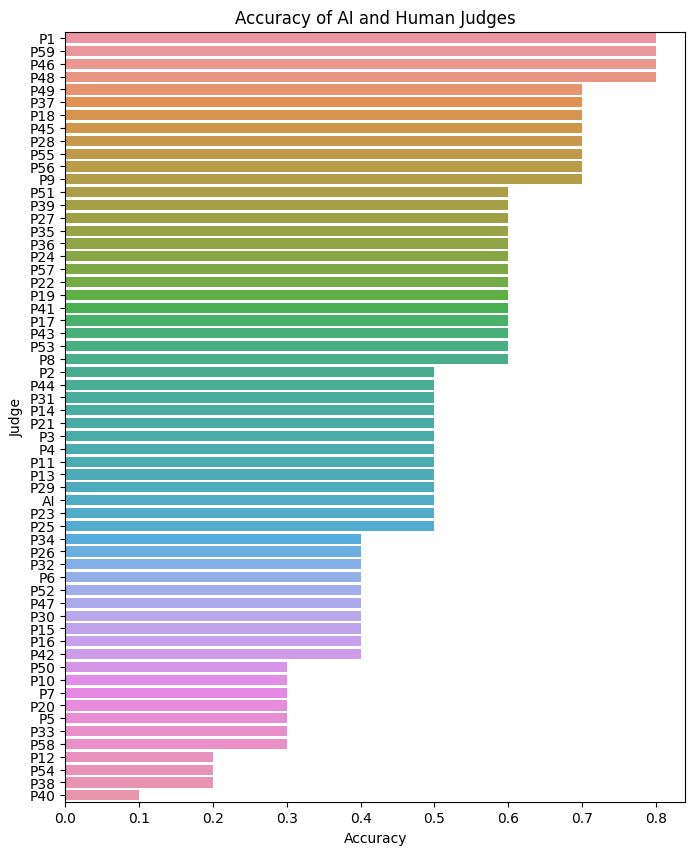

In [8]:
plt.figure(figsize=(8, 10))

# Creating Bar Charts
sns.barplot(x='Accuracy', y='Judge', data=total_accuracy_df.sort_values('Accuracy', ascending=False))

# add tittle
plt.title('Accuracy of AI and Human Judges')

# show img
plt.show()

## R2

In [10]:
# Load the background data
background_df = pd.read_excel('/content/drive/MyDrive/questionnaire_data_bg.xlsx')

# Transpose the background dataframe
background_df_transposed = background_df.set_index('Background_information_of_participants').T

# Combine the 'Yes'/'No' values into a single string for each participant
background_df_transposed['Group'] = background_df_transposed.apply(lambda row: '-'.join(row.values), axis=1)

# Merge the background information with the accuracy dataframe
accuracy_df = accuracy_df.join(background_df_transposed['Group'], on='Judge')

# Group by the 'Group' column to calculate the mean accuracy for each group
grouped_accuracy = accuracy_df.groupby('Group')['Accuracy'].mean().reset_index()



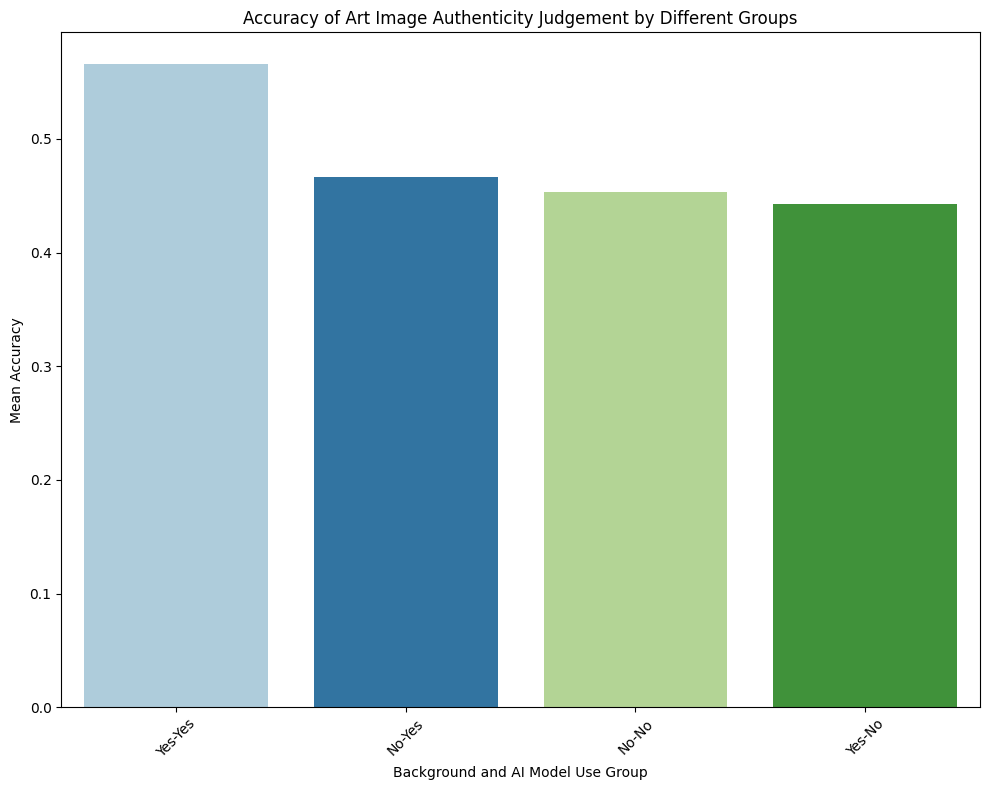

In [33]:


# 创建条形图，并指定颜色主题
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Group',
    y='Accuracy',
    data=grouped_accuracy.sort_values('Accuracy', ascending=False),
    palette='Paired'  # 指定颜色映射
)
plt.title('Accuracy of Art Image Authenticity Judgement by Different Groups')
plt.xlabel('Background and AI Model Use Group')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## R3

In [12]:

# Load the data from the uploaded Excel file
clues_df = pd.read_excel('/content/drive/MyDrive/questionnaire_data_clues.xlsx')

# Initialize a dictionary to hold the count of each clue for all participants
all_clue_counts = {}

# Iterate over each participant column
for column in clues_df.columns[1:]:  # Assuming the first column is 'image_ID'
    # Iterate over each row and count the occurrences of each clue for the participant
    for clues in clues_df[column].dropna():
        # Split the clues based on the delimiter '┋'
        for clue in clues.split('┋'):
            # Increment the count of the clue in the dictionary
            if clue in all_clue_counts:
                all_clue_counts[clue] += 1
            else:
                all_clue_counts[clue] = 1

# Convert the dictionary to a DataFrame for easier plotting
all_clue_counts_df = pd.DataFrame(list(all_clue_counts.items()), columns=['Clue', 'Count'])

# Sort the DataFrame by count in descending order
all_clue_counts_df = all_clue_counts_df.sort_values('Count', ascending=False).reset_index(drop=True)



In [13]:
print(all_clue_counts_df)

                  Clue  Count
0    Overall coherence    273
1         Skin texture    237
2   Lights and shadows    220
3                 Hair    127
4                 Eyes    120
5                 Face    112
6    Facial expression    104
7         Hair texture     93
8              Content     92
9                  Lip     84
10                Nose     70
11            Forehead     64
12            Eyebrows     62
13         Accessories     59
14                Chin     58
15             Outfits     47
16                Ears     47
17          Hair style     36
18                nose      9


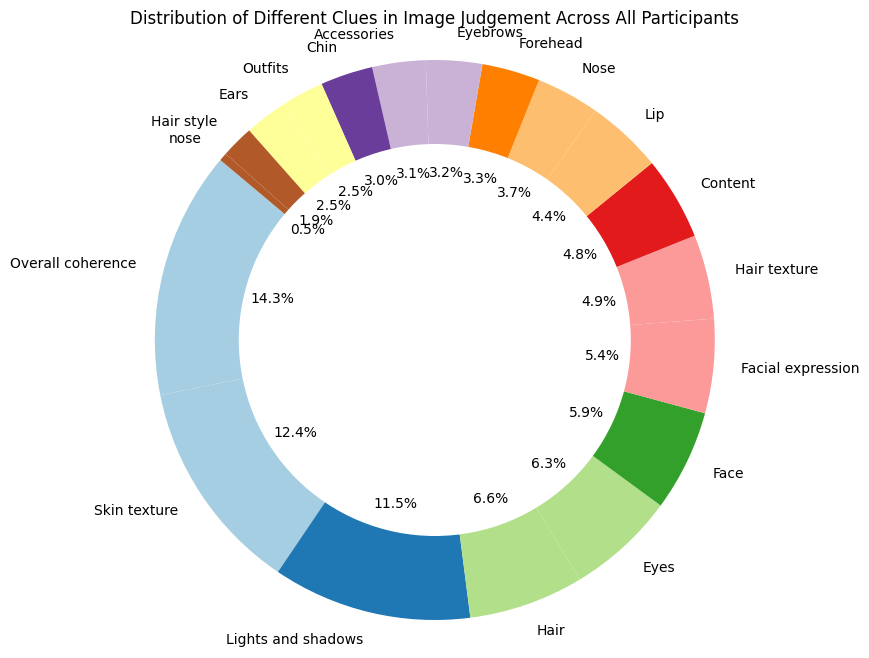

In [34]:
# 使用matplotlib的颜色映射
# colors = plt.cm.Paired(range(len(all_clue_counts_df['Count'])))
colors = plt.cm.Paired(np.linspace(0, 1, len(all_clue_counts_df['Count'])))

# 使用指定的颜色列表创建饼图
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    all_clue_counts_df['Count'],
    labels=all_clue_counts_df['Clue'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,  # 使用颜色映射
    wedgeprops=dict(width=0.4)
)

# 其余的代码保持不变...

# Draw a white circle in the center to create the donut hole
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set the color of the text to black for better readability
for text in autotexts:
    text.set_color('black')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title of the chart
plt.title('Distribution of Different Clues in Image Judgement Across All Participants')

# Show the pie chart
plt.show()


## R4

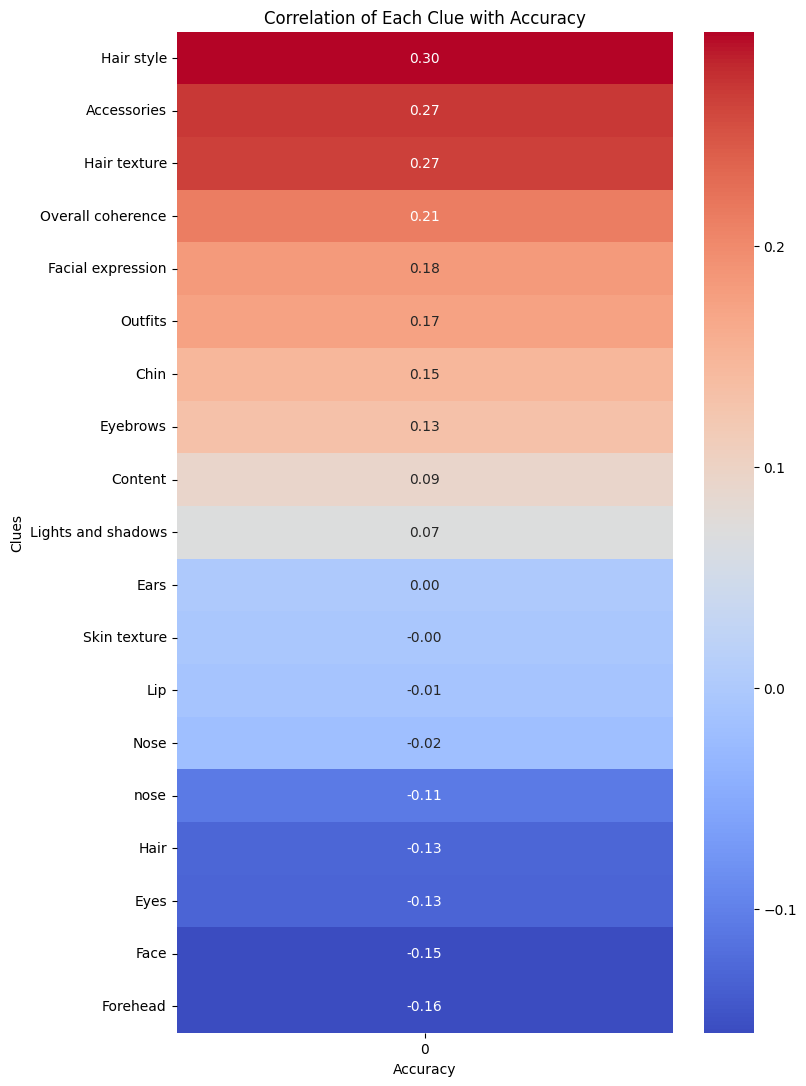

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
file_path_identification = '/content/drive/MyDrive/questionnaire_data.xlsx'
file_path_clues = '/content/drive/MyDrive/questionnaire_data_clues.xlsx'

data_identification = pd.read_excel(file_path_identification)
data_clues = pd.read_excel(file_path_clues)

# Calculating accuracy for each participant
merged_data = data_identification.melt(id_vars=['image_ID', 'AI_Judgement', 'Actual_Reality'],
                                       var_name='Participant', value_name='Judgement')
merged_data['Correct'] = merged_data['Judgement'] == merged_data['Actual_Reality']
participant_accuracy = merged_data.groupby('Participant')['Correct'].mean().reset_index()

# Preprocessing clues data
data_clues_long = data_clues.melt(id_vars=['image_ID'], var_name='Participant', value_name='Clues')
merged_clues_accuracy = data_clues_long.merge(participant_accuracy, on='Participant')
merged_clues_accuracy['Clues_Count'] = merged_clues_accuracy['Clues'].apply(lambda x: len(x.split('┋')) if pd.notnull(x) else 0)

# Extracting all unique clues from the dataset
all_clues = set()
for clues in merged_clues_accuracy['Clues'].dropna():
    all_clues.update(clues.split('┋'))

# Creating a column for each unique clue
for clue in all_clues:
    merged_clues_accuracy[clue] = merged_clues_accuracy['Clues'].apply(lambda x: clue in x.split('┋') if pd.notnull(x) else False)

# Aggregating data by participant
clue_columns = list(all_clues)
participant_clue_data = merged_clues_accuracy.groupby('Participant')[clue_columns].sum()
participant_clue_data['Accuracy'] = participant_accuracy.set_index('Participant')

# Correlation analysis between each clue and the participant's accuracy
correlation_matrix = participant_clue_data.corr()
clue_accuracy_correlation = correlation_matrix['Accuracy'].drop('Accuracy').sort_values(ascending=False)

# Plotting the correlation of each clue with accuracy
plt.figure(figsize=(8, 13))
sns.heatmap(np.array([clue_accuracy_correlation]).T, annot=True, fmt=".2f", cmap='coolwarm', yticklabels=clue_accuracy_correlation.index)
plt.title('Correlation of Each Clue with Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Clues')
plt.show()

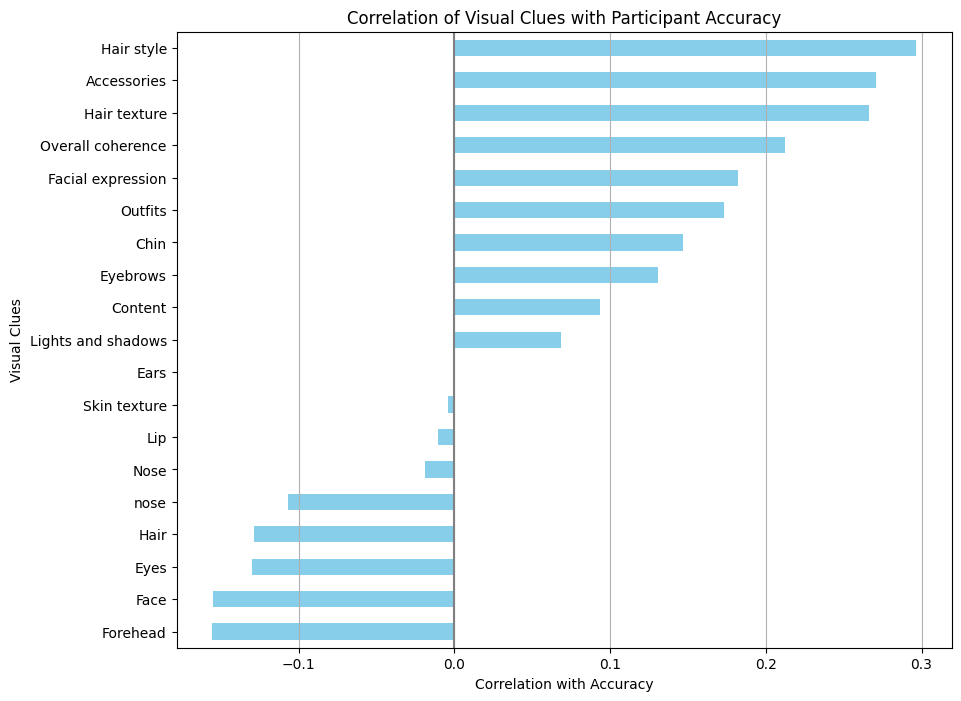

In [17]:
# Sorting the correlation values for better visualization in the bar chart
sorted_clue_accuracy_correlation = clue_accuracy_correlation.sort_values()

# Plotting the bar chart
plt.figure(figsize=(10, 8))
sorted_clue_accuracy_correlation.plot(kind='barh', color='skyblue')
plt.title('Correlation of Visual Clues with Participant Accuracy')
plt.xlabel('Correlation with Accuracy')
plt.ylabel('Visual Clues')
plt.axvline(x=0, color='grey', lw=1.5)
plt.grid(axis='x')
plt.show()

## Alternative

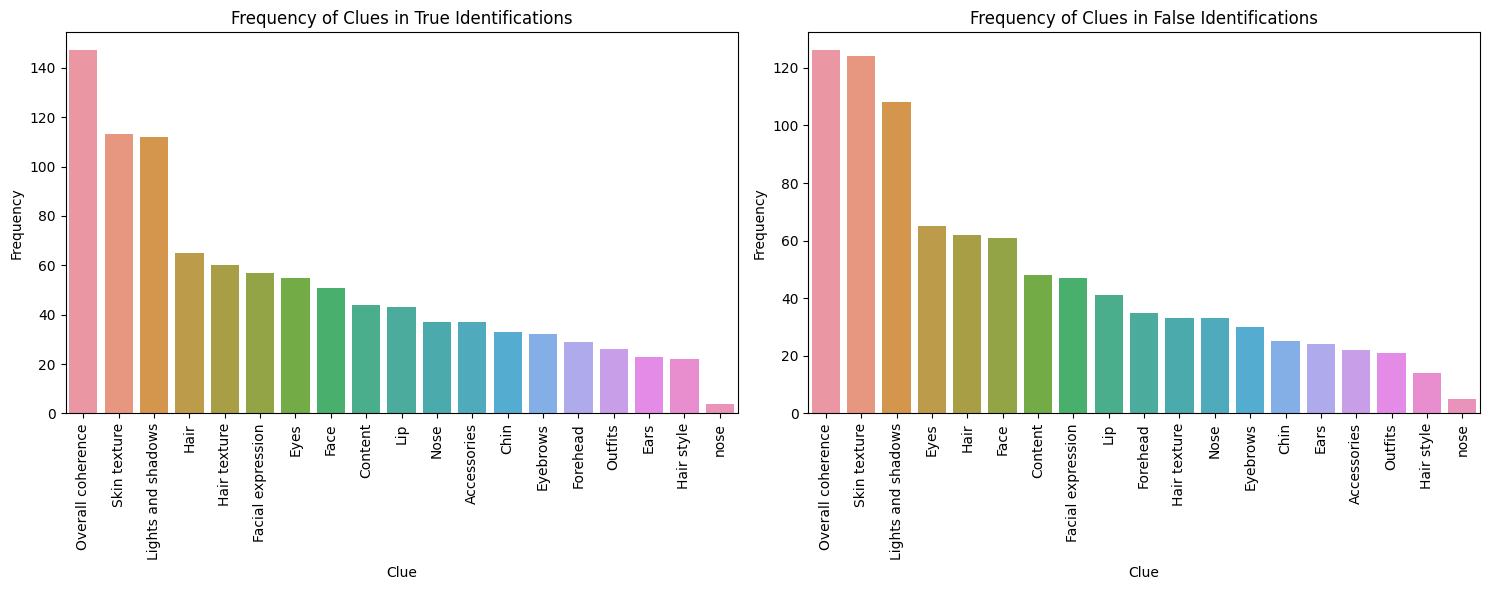

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the datasets
file_path_data = '/content/drive/MyDrive/questionnaire_data.xlsx'
file_path_clues = '/content/drive/MyDrive/questionnaire_data_clues.xlsx'
data = pd.read_excel(file_path_data)
clues = pd.read_excel(file_path_clues)

# Extract the 'Actual_Reality' for comparison
actual_reality = data.set_index('image_ID')['Actual_Reality']

# Reshape the clues dataset for easier analysis
clues_melted = clues.melt(id_vars='image_ID', var_name='Participant', value_name='Clues')

# Expand the clues dataset
clues_expanded = clues_melted.drop('Clues', axis=1).join(
    clues_melted['Clues'].str.split('┋').explode().str.strip())

# Add a column to indicate true or false identification
clues_expanded['Identification'] = clues_expanded.apply(
    lambda row: 'True Identify' if data.loc[data['image_ID'] == row['image_ID'], row['Participant']].values[0] == actual_reality[row['image_ID']] else 'False Identify',
    axis=1
)

# Separate the dataset into true and false identifications
true_identify_clues = clues_expanded[clues_expanded['Identification'] == 'True Identify']['Clues']
false_identify_clues = clues_expanded[clues_expanded['Identification'] == 'False Identify']['Clues']

# Count the frequency of each clue
true_identify_counts = Counter(true_identify_clues)
false_identify_counts = Counter(false_identify_clues)

# Convert to DataFrame for easier plotting
true_identify_df = pd.DataFrame.from_dict(true_identify_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)
false_identify_df = pd.DataFrame.from_dict(false_identify_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Plotting the histograms
plt.figure(figsize=(15, 6))

# True Identifications
plt.subplot(1, 2, 1)
sns.barplot(x=true_identify_df.index, y=true_identify_df['Count'])
plt.title('Frequency of Clues in True Identifications')
plt.xlabel('Clue')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# False Identifications
plt.subplot(1, 2, 2)
sns.barplot(x=false_identify_df.index, y=false_identify_df['Count'])
plt.title('Frequency of Clues in False Identifications')
plt.xlabel('Clue')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## R5

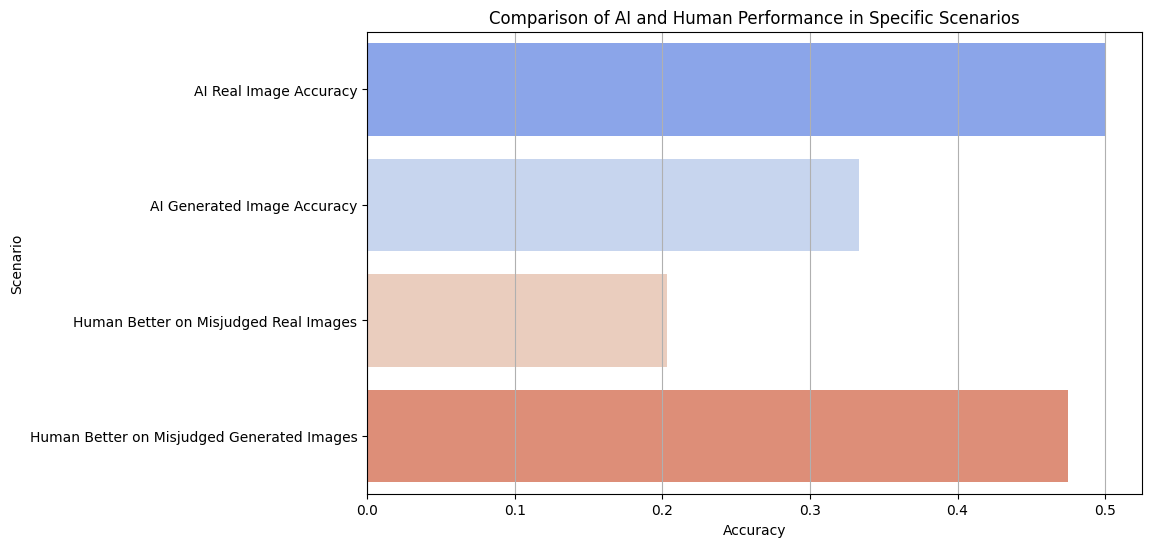

In [20]:
data_new = data #data from questionnaire_data
# Correcting the AI accuracy for real images to 50% as per the updated information
ai_real_accuracy_corrected = 0.50

generated_images = data_new[data_new['Actual_Reality'] == 'Generated']
ai_generated_accuracy = (generated_images['AI_Judgement'] == 'Generated').mean()


# Re-analyzing the scenarios where humans perform better than AI with the corrected AI accuracy
# For real images that AI misjudged
human_better_real_corrected = (data_new.loc[(data_new['Actual_Reality'] == 'Real') & (data_new['AI_Judgement'] != 'Real'), 'P1':'P59'] == 'Real').mean().mean()

# For generated images that AI misjudged
human_better_generated_corrected = (data_new.loc[(data_new['Actual_Reality'] == 'Generated') & (data_new['AI_Judgement'] != 'Generated'), 'P1':'P59'] == 'Generated').mean().mean()

(human_better_real_corrected, human_better_generated_corrected)

# 可视化
# Data Visualization: Comparing the performance of human evaluators and AI in specific scenarios

# Preparing the data for visualization
accuracy_data = {
    'AI Real Image Accuracy': ai_real_accuracy_corrected,
    'AI Generated Image Accuracy': ai_generated_accuracy,
    'Human Better on Misjudged Real Images': human_better_real_corrected,
    'Human Better on Misjudged Generated Images': human_better_generated_corrected
}

# Converting to DataFrame for plotting
accuracy_df = pd.DataFrame(list(accuracy_data.items()), columns=['Scenario', 'Accuracy'])

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Scenario', data=accuracy_df, palette='coolwarm')
plt.title('Comparison of AI and Human Performance in Specific Scenarios')
plt.xlabel('Accuracy')
plt.ylabel('Scenario')
plt.grid(axis='x')

# Show the plot
plt.show()